In [ ]:
""" 
                                                                                  UNSUPERVISED MACHINE LEARNING MATERI PENGENALAN 3

=> model machine learning akan mempelajari pola dan struktur pada data berdasarkan hubungan atau keterkaitan antar variabel pada data. 
   Model kemudian akan mengelompokkan data ini ke dalam beberapa klaster yang berbeda. Teknik ini disebut sebagai clustering. 

   Beberapa algoritma unsupervised learning yang penting untuk Anda ketahui adalah: 

   - clustering, 
   - dimensionality reduction, 
   - anomaly detection, 
   - density estimation. 

=>pengklasteran adalah sebuah metode machine learning unsupervised untuk mengelompokkan objek-objek yang memiliki kemiripan, ke dalam sebuah klaster. 
  Karena termasuk kategori unsupervised, maka dataset yang digunakan model clustering tidak memiliki label.

=>Bagaimana proses pemberian label ini? 
  - Data yang memiliki kemiripan akan dikelompokkan, lalu setiap data pada kelompok yang sama akan diberikan label yang sama.

=>Sebuah model pengklasteran akan membandingkan atribut setiap pengunjung lalu 
  membuat sebuah klaster yang diisi oleh pengunjung yang memiliki kemiripan karakteristik/atribut yang tinggi.

-> Hal yang paling pertama K-Means lakukan adalah memilih sebuah sampel secara acak untuk dijadikan centroid. Centroid adalah sebuah sampel pada data yang menjadi pusat dari sebuah klaster.
  Kita bisa melihat pada gambar bahwa 3 sampel yang dijadikan centroid diberi warna biru, hijau dan kuning.
"""

# Bagian Baru

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('Mall_Customers.csv')
 
# tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [14]:
df = df.rename(columns={
    'Gender': 'jenis_kelamin',
    'Age': 'umur',
    'Annual Income (k$)' : 'pendapatan_income',
    'Spending Score (1-100)' : 'score_habis'
})


In [15]:
df['jenis_kelamin'].replace(['Female', 'Male'], [0,1], inplace=True)

In [16]:
X = df.drop(['CustomerID', 'jenis_kelamin'], axis=1)

In [17]:
# mencari cluster yang paling optimal

In [18]:
from sklearn.cluster import KMeans

In [23]:
import seaborn as sns

In [20]:
wcss = []

for i in range(1,15):
  k = KMeans(i)
  k.fit(X)
  wcss.append(k.inertia_)

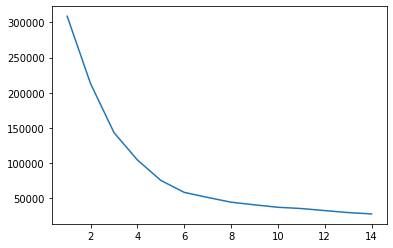

In [25]:
# membuat plot inertia
sns.lineplot(x=list(range(1, 15)), y=wcss)

In [ ]:
# cluseter siku atau eibow method yaitu 5

In [44]:
km = KMeans(n_clusters=5, random_state=42).fit(X)
y_means = km.predict(X)
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


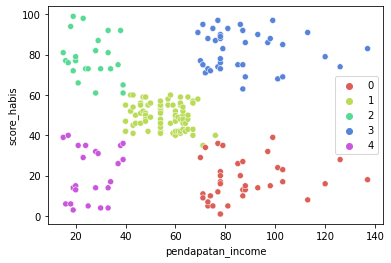

In [45]:
sns.scatterplot(X['pendapatan_income'], X['score_habis'], hue= y_means, palette=sns.color_palette('hls', 5))